<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/20220419_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

##Grupo 31
**Integrantes:**

* Victor Nicolas Rocco
* Maria Mercedes Silva
* Santiago Franco
* Williams Gremoliche

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
from scipy.stats import t

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


In [ ]:
#filtro por salary_monthly_NETO minimo y maximo

#--- VARIABLES ---
QMIN = df['salary_monthly_NETO'].quantile(0.05)
QMAX = df['salary_monthly_NETO'].quantile(0.95)

print("QMIN:", QMIN, "QMAX:", QMAX)

df_new = df[(df['salary_monthly_NETO'] > QMIN) & (df['salary_monthly_NETO'] < QMAX)] #.dropna()
df_new



QMIN: 22500.0 QMAX: 210000.0


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,Hombre,32,Argentina,Provincia de Buenos Aires,13.0,0.0,3.0,0,Secundario,Completado,...,Jamás,Heterosexual,NaN,No,101-200,Servicios / Consultoría de Software / Digital,9,9,"Abono de celular, Clases de gimnasia online, C...",NaN
6089,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,3.0,0.0,0,Universitario,Completado,...,En mi trabajo actual,Heterosexual,NaN,NaN,2001-5000,Otras industrias,7,8,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN


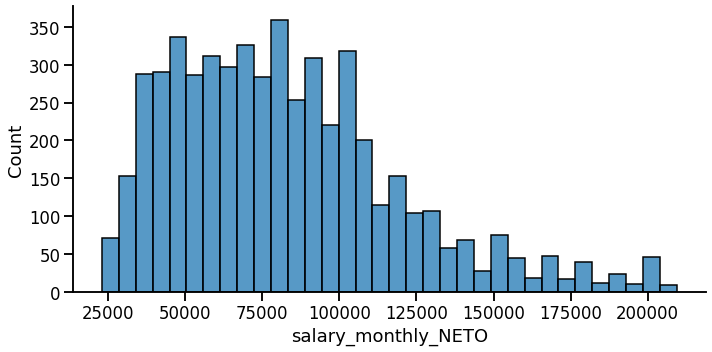

In [ ]:
sns.displot(df_new['salary_monthly_NETO'], stat='count', aspect=2)

In [ ]:
is_man = df.profile_gender == 'Hombre'

#groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
#groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO
groupA = df_new[is_man].salary_monthly_NETO
groupB = df_new[~is_man].salary_monthly_NETO
#grupoTotal = groupA.add(groupB)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [ ]:
#10
#Calculamos la media de cada muestra de subpoblacion
media_salarioNETO_hombres= groupA.mean()
media_salarioNETO_otros  = groupB.mean()
print("media_salarioNETO_hombres:", media_salarioNETO_hombres)
print("media_salarioNETO_otros  :", media_salarioNETO_otros)

media_salarioNETO_hombres: 84023.45843651156
media_salarioNETO_otros  : 74325.93636257309


In [ ]:
#20
#Calculamos la desviacion estandard cada muestra de subpoblacion
std_salarioNETO_hombres   = groupA.std()
std_salarioNETO_otros = groupB.std()
print("std_salarioNETO_hombres:", std_salarioNETO_hombres)
print("std_salarioNETO_otros  :", std_salarioNETO_otros)

std_salarioNETO_hombres: 37318.57325596034
std_salarioNETO_otros  : 33936.41593481668


In [ ]:
#22
diferencia_de_medias = abs(media_salarioNETO_hombres - media_salarioNETO_otros)
print("Estimación de diferencias de medias poblacional:", diferencia_de_medias)

Estimación de diferencias de medias poblacional: 9697.522073938468


In [ ]:
#30
#Intervalo de confianza para la media de nivel 0.95, utilizamos el score Z (alpha/2)=1.96
#percentil (1-alpha/2) (o (1-alpha/2)*100%) de una Normal Estandar
z_0975 = 1.96

In [ ]:
#31
#Verificacion de Z
from scipy.stats import t
t_de_alfa_sobre_2 = abs(t.ppf(alpha/2, df_new['salary_monthly_NETO']).mean())
t_de_alfa_sobre_2

1.9599992268609971

In [ ]:
#40
#Cantidad de datos
Ndatos_hombres= groupA.count()
Ndatos_otros  = groupB.count()
Ndatos_total  = Ndatos_hombres + Ndatos_otros
print("hombres:", Ndatos_hombres)
print("otros  :", Ndatos_otros)
print("total  :", Ndatos_total)


hombres: 4426
otros  : 855
total  : 5281



#41
#formulas para calcular en intervalo de confianza

#http://www.ub.edu/aplica_infor/spss/cap4-3.htm

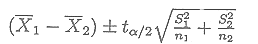



In [ ]:
#50
#Siguiendo la formula en #41, primero calculo la varianza muestral S2 para ambas subpoblaciones

import statistics

S2_hombres = statistics.variance(groupA)
S2_otros   = statistics.variance(groupB)

print("varianza muestral hombres:", S2_hombres)
print("varianza muestral otros  :", S2_otros)

varianza muestral hombres: 1392675909.8604822
varianza muestral otros  : 1151680326.5008752


In [ ]:
#50
#Siguiendo la formula de #41, ahora calculo la raiz cuadrada con todo lo que esta dentro de la misma
import math

raiz_e_interior = math.sqrt(S2_hombres/Ndatos_hombres + S2_otros/Ndatos_otros)
raiz_e_interior

1289.0509857893321

In [ ]:
#60
#Siguiendo con la formula de #41, calculo los limites del intervalo de confianza

limite_inferior = diferencia_de_medias - t_de_alfa_sobre_2 * raiz_e_interior
limite_superior = diferencia_de_medias + t_de_alfa_sobre_2 * raiz_e_interior

print("limite inferior del intervalo de confianza:", limite_inferior)
print("limite superior del intervalo de confianza:", limite_superior)


limite inferior del intervalo de confianza: 7170.98313840697
limite superior del intervalo de confianza: 12224.061009469966


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


#70
#Descripcion de hipótesis

H0 = "Salario medio de los hombres igual que otros" (hipótesis nula)

H1 = "Salario medio de los hombres distinto que otros"


H0 = mean(groupA) == mean(groupB)

H1 = mean(groupA) <> mean(groupB)



 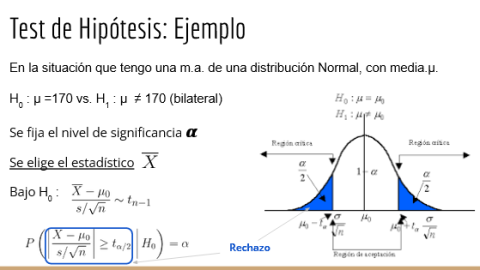

In [ ]:
#80

#Defino alpha 5%
alpha = 0.05

t_de_alpha_sobre_2 = 1.96 #por tabla

Xhombres = groupA.mean()
Xotros   = groupB.mean()

print("media hombres:", Xhombres)
print("media otros  :", Xotros)

media hombres: 84023.45843651156
media otros  : 74325.93636257309


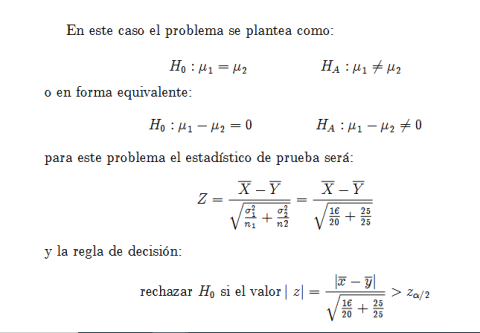

In [ ]:
#90
#Calculamos con Scipy
import scipy

estadistico, pvalor = scipy.stats.ttest_ind(groupA, groupB, equal_var=False)
#equal_var=False, perform Welch’s t-test, which does not assume equal population variance

print("estadistico:", estadistico)
print("pvalor     :", pvalor)

estadistico: 7.522993412087784
pvalor     : 1.0015183695059105e-13


In [ ]:
#100
#Verificamos con formula
raiz_e_interior = math.sqrt(S2_hombres/Ndatos_hombres + S2_otros/Ndatos_otros)
estadisticoZ = abs(Xhombres-Xotros)/raiz_e_interior
estadisticoZ

7.522993412087829










### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

#110
Conclusion: como pvalor es menor a 0.05 (alpha), rechazamos la hipótesis nula, o sea, podemos concluir que la media del salario de los hombres no es igual al de otros.
 


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
#120
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#130
from numpy.ma.core import power
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power = 0.8
ratio = 1

In [ ]:
#140
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

193.20650579873572

In [ ]:
#150
power = 0.9
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

258.3214343813156

In [ ]:
#160
power = 0.95
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

319.2418553695633

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [ ]:
def group(x):
  if(x == "Hombre"):
    return "Hombres"
  else:
    return "Otros"
df_new["Grupo"] = df_new["profile_gender"].apply(group)
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,group,Grupo
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,Otros,Otros
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,Hombres,Hombres
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,Otros,Otros
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN,Hombres,Hombres
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN,Hombres,Hombres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,Hombre,32,Argentina,Provincia de Buenos Aires,13.0,0.0,3.0,0,Secundario,Completado,...,NaN,No,101-200,Servicios / Consultoría de Software / Digital,9,9,"Abono de celular, Clases de gimnasia online, C...",NaN,Hombres,Hombres
6089,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,3.0,0.0,0,Universitario,Completado,...,NaN,NaN,2001-5000,Otras industrias,7,8,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN,Hombres,Hombres
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN,Hombres,Hombres
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN,Hombres,Hombres


In [ ]:
df_newreporte = df_new[['Grupo', 'profile_studies_level', 'salary_monthly_NETO']]
df_newreporte

,Grupo,profile_studies_level,salary_monthly_NETO
0,Otros,Universitario,43000.0
1,Hombres,Universitario,63000.0
2,Otros,Secundario,127000.0
3,Hombres,Posgrado,102000.0
4,Hombres,Universitario,106000.0
...,...,...,...
6088,Hombres,Secundario,56450.0
6089,Hombres,Universitario,130000.0
6090,Hombres,Terciario,97000.0
6091,Hombres,Universitario,71000.0


[Text(0, 0.5, 'Salario neto'), Text(0.5, 0, 'Nivel de estudios')]

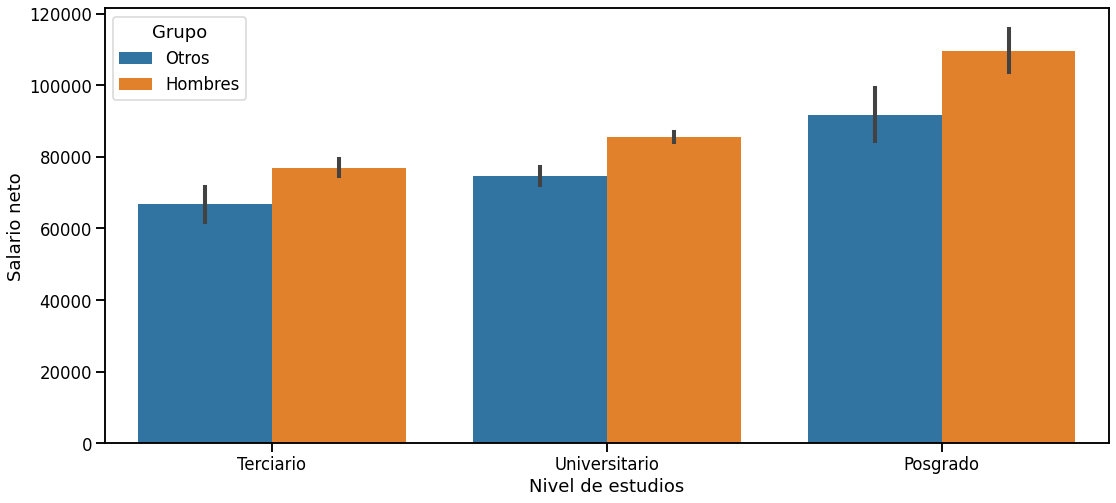

In [ ]:
import numpy as np

SORTED_STUDIES_LEVELS = ['Terciario', 'Universitario', 'Posgrado']
plt.figure(figsize=(18, 8))
sns.barplot(data=df_newreporte, y='salary_monthly_NETO', x='profile_studies_level', hue="Grupo", estimator=np.mean, order=SORTED_STUDIES_LEVELS).set(
    xlabel='Nivel de estudios', 
    ylabel='Salario neto'
)

#Resultados de la Encuesta de Sueldos 2020
Se evidencia un mayor nivel salarial de los hombres, respecto a los otros géneros, en el mundo del software, en cada nivel de estudio.